# Some functions to get started:

In [2]:
# list of library for this project
import requests
import pprint as pp
import matplotlib.pyplot as plt
import datetime
from datetime import date 
from datetime import datetime
# you might need to add a few of your own

In [3]:
# function for calling the API to retrieve JSON
def call_api_with(url_extension):
    your_company_house_api_key ="ec7b8729-7db6-4912-bb72-6d49b85a7fb2"
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"
    # above: could be eg. https://api.companieshouse.gov.uk/search/companies?q=shop&items_per_page=1
    print(f'requesting: {url}') 
    # above, optional: printing, so that you see visually how many calls you are making
    res = requests.get(url, headers=login_headers) #, verify=False)
    return res.json()

# test to get one company
def get_one_test_company_or_error():
    url = f"search/companies?q=shop&items_per_page=1"
    return call_api_with(url)

# search company with specific query / keyword
def search_for_companies_with_query(query, optionalNumber_of_companies = 200):
    url = f"search/companies?q={query}&items_per_page={optionalNumber_of_companies}"
    return call_api_with(url).get('items', [])

# request to get company data based on company number
def data_for_company(company_number):
    url = f"company/{company_number}"
    return call_api_with(url)

# get all persons with significant control from company which contains specific keyword
def all_persons_in_company(company_number):
    url = f"company/{company_number}/persons-with-significant-control"
    return call_api_with(url).get('items', [])

def detailed_info_about_companies_with_ids(companies_numbers):
    results = []
    for company_number in companies_numbers:
        results.append(data_for_company(company_number))
    return results
    # when calling this, think - how will you get just the ids from search_for_companies_with_query?
    # maybe you could write another function that will combine search and detailed_info ?

In [4]:
pp.pprint(get_one_test_company_or_error())

requesting: https://api.companieshouse.gov.uk/search/companies?q=shop&items_per_page=1
{'items': [{'address': {'address_line_1': 'London Road',
                        'address_line_2': 'West Kingsdown',
                        'country': 'England',
                        'locality': 'Sevenoaks',
                        'postal_code': 'TN15 6EL',
                        'premises': 'Unit 11',
                        'region': 'Kent'},
            'address_snippet': 'Unit 11 London Road, West Kingsdown, '
                               'Sevenoaks, Kent, England, TN15 6EL',
            'company_number': '11501653',
            'company_status': 'active',
            'company_type': 'ltd',
            'date_of_creation': '2018-08-06',
            'description': '11501653 - Incorporated on  6 August 2018',
            'description_identifier': ['incorporated-on'],
            'kind': 'searchresults#company',
            'links': {'self': '/company/11501653'},
            'matches': {'snip

In [5]:
bagel_companies = search_for_companies_with_query("bagel", optionalNumber_of_companies = 10)
pp.pprint(len(bagel_companies))
pp.pprint(bagel_companies)

requesting: https://api.companieshouse.gov.uk/search/companies?q=bagel&items_per_page=10
10
[{'address': {'address_line_1': 'Castlehill Wood',
              'address_line_2': '4 Castlehill Wood',
              'country': 'Northern Ireland',
              'locality': 'Belfast',
              'po_box': 'BT4 3PJ',
              'postal_code': 'BT4 3PJ',
              'premises': '4',
              'region': 'Antrim'},
  'address_snippet': 'BT4 3PJ, 4 Castlehill Wood, 4 Castlehill Wood, Belfast, '
                     'Antrim, Northern Ireland, BT4 3PJ',
  'company_number': 'NI641354',
  'company_status': 'active',
  'company_type': 'ltd',
  'date_of_creation': '2016-10-10',
  'description': 'NI641354 - Incorporated on 10 October 2016',
  'description_identifier': ['incorporated-on'],
  'kind': 'searchresults#company',
  'links': {'self': '/company/NI641354'},
  'matches': {'snippet': [], 'title': [1, 5]},
  'snippet': '',
  'title': 'BAGEL LIMITED'},
 {'address': {'address_line_1': 'Main 

In [6]:
pp.pprint(data_for_company(11501653))

requesting: https://api.companieshouse.gov.uk/company/11501653
{'accounts': {'accounting_reference_date': {'day': '31', 'month': '08'},
              'last_accounts': {'made_up_to': '2020-08-31',
                                'period_end_on': '2020-08-31',
                                'period_start_on': '2019-09-01',
                                'type': 'unaudited-abridged'},
              'next_accounts': {'due_on': '2022-05-31',
                                'overdue': False,
                                'period_end_on': '2021-08-31',
                                'period_start_on': '2020-09-01'},
              'next_due': '2022-05-31',
              'next_made_up_to': '2021-08-31',
              'overdue': False},
 'can_file': True,
 'company_name': 'BRANDS HATCH PERFORMANCE GARAGE LIMITED',
 'company_number': '11501653',
 'company_status': 'active',
 'confirmation_statement': {'last_made_up_to': '2021-08-05',
                            'next_due': '2022-08-19',
    

In [7]:
pp.pprint(all_persons_in_company(11501653))

requesting: https://api.companieshouse.gov.uk/company/11501653/persons-with-significant-control
[{'address': {'address_line_1': 'London Road',
              'address_line_2': 'West Kingsdown',
              'country': 'England',
              'locality': 'Sevenoaks',
              'postal_code': 'TN15 6EL',
              'premises': 'Unit 11',
              'region': 'Kent'},
  'country_of_residence': 'England',
  'date_of_birth': {'month': 6, 'year': 1969},
  'etag': '03104a4933da0abf41b9c960f447d3ad1bc5d577',
  'kind': 'individual-person-with-significant-control',
  'links': {'self': '/company/11501653/persons-with-significant-control/individual/W2U4Z0IljlHyV53BTr9A-IeGuVE'},
  'name': 'Mr Clint Gaskin',
  'name_elements': {'forename': 'Clint', 'surname': 'Gaskin', 'title': 'Mr'},
  'nationality': 'British',
  'natures_of_control': ['ownership-of-shares-25-to-50-percent',
                         'voting-rights-25-to-50-percent',
                         'right-to-appoint-and-remove-

In [8]:
# if you will do this a lot, maybe wrote a function that abstracts it a bit better
bagel_companies = search_for_companies_with_query("bagel", optionalNumber_of_companies = 5)
just_ids = [company['company_number'] 
            for company in bagel_companies]
detailed_info_about_companies_with_ids(just_ids)

requesting: https://api.companieshouse.gov.uk/search/companies?q=bagel&items_per_page=5
requesting: https://api.companieshouse.gov.uk/company/NI641354
requesting: https://api.companieshouse.gov.uk/company/05343065
requesting: https://api.companieshouse.gov.uk/company/02780778
requesting: https://api.companieshouse.gov.uk/company/12903963
requesting: https://api.companieshouse.gov.uk/company/13288258


[{'links': {'persons_with_significant_control': '/company/NI641354/persons-with-significant-control',
   'filing_history': '/company/NI641354/filing-history',
   'self': '/company/NI641354',
   'officers': '/company/NI641354/officers'},
  'sic_codes': ['96010'],
  'registered_office_address': {'postal_code': 'BT4 3PJ',
   'region': 'Antrim',
   'address_line_1': '4 Castlehill Wood',
   'locality': 'Belfast',
   'po_box': 'BT4 3PJ',
   'address_line_2': '4 Castlehill Wood',
   'country': 'Northern Ireland'},
  'has_insolvency_history': False,
  'company_status': 'active',
  'company_number': 'NI641354',
  'type': 'ltd',
  'confirmation_statement': {'overdue': False,
   'next_made_up_to': '2022-10-12',
   'next_due': '2022-10-26',
   'last_made_up_to': '2021-10-12'},
  'undeliverable_registered_office_address': False,
  'jurisdiction': 'northern-ireland',
  'accounts': {'accounting_reference_date': {'month': '03', 'day': '31'},
   'next_accounts': {'period_start_on': '2020-04-01',
    'd

## Business Question Example
- 'Is lifespan of Crypto companies short?' - what patterns can you see in the 'company_status' (i.e. 'active' vs 'dissolved') of companies with these words in name? (eg. what word in the name has higher likelihood that the company is dissolved: 'crypto' or 'gold')

In [15]:
# Getting 100 companies with "Coin" in name and another 100 with "Crypto" in name to have a sample of various Crypto companies
companies_coin = search_for_companies_with_query("Coin", optionalNumber_of_companies = 100)
companies_crypto = search_for_companies_with_query("Crypto", optionalNumber_of_companies = 100)
all_companies = companies_coin + companies_crypto

# Printing an example to see the data structure
print(len(all_companies))
pp.pprint(all_companies[199])

requesting: https://api.companieshouse.gov.uk/search/companies?q=Coin&items_per_page=100
requesting: https://api.companieshouse.gov.uk/search/companies?q=Crypto&items_per_page=100
200
{'address': {'address_line_1': 'Southside Street',
             'country': 'England',
             'locality': 'Plymouth',
             'postal_code': 'PL1 2LE',
             'premises': '36'},
 'address_snippet': '36 Southside Street, Plymouth, England, PL1 2LE',
 'company_number': '13183656',
 'company_status': 'active',
 'company_type': 'private-limited-guarant-nsc',
 'date_of_creation': '2021-02-05',
 'description': '13183656 - Incorporated on  5 February 2021',
 'description_identifier': ['incorporated-on'],
 'kind': 'searchresults#company',
 'links': {'self': '/company/13183656'},
 'matches': {'snippet': [], 'title': [1, 6]},
 'snippet': '',
 'title': 'CRYPTO CONVENIENCE STORES LIMITED'}


In [16]:
# Double-checking for concurrence in two dictionaries (since we have the merged dictionary all_companies' lenght as 200 we do not expect any company occuring in both groups)
companies_in_both = []
for company in companies_coin:
    if company in companies_crypto:
        companies_coin.remove(company)
        companies_in_both.append(company)
        companies_crypto.remove(company)
if len(companies_in_both) == 0:
    print("No concurrence") 
else:
    print(companies_in_both)

No concurrence


In [17]:
# Defining a function to get a list of company names only
def get_company_names(companies):
    company_names=[]
    for company in companies:
        company_names.append(company['title']) 
    return company_names

In [18]:
# Finding out companies with both "Crypto" and "Coin" in their names to separate them
import re

company_names = get_company_names(all_companies)
#print(company_names)

company_names_with_both = [word for word in company_names if re.search('.*COIN.*', word) and re.search('.*CRYPTO.*', word)]
print(company_names_with_both)

['CRYPTO CASHBACK COIN LTD', 'CRYPTO COIN COMPARISON LTD', 'CRYPTO COINS MANAGEMENT LTD']


In [19]:
# Excluding the third group with both words in their names from existing groups
def remove_if_has_both(companies):
    for company in companies:
        if company['title'] in company_names_with_both:
            companies.remove(company)
    return companies

print(f"Companies with 'Coin' in names updated: {len(remove_if_has_both(companies_coin))}")
print(f"Companies with 'Crypto' in names updated: {len(remove_if_has_both(companies_crypto))}")

Companies with 'Coin' in names updated: 100
Companies with 'Crypto' in names updated: 98


In [20]:
# Creating a separate dictionary for companies with both words in their names
companies_with_both = []
for company in all_companies:
    if company['title'] in company_names_with_both:
        companies_with_both.append(company)
#pp.pprint(companies_with_both)

Number of active Crypto-companies with 'Coin' in name: 74 out of 100, 74.0%
Number of active Crypto-companies with 'Crypto' in name: 80 out of 97, 82.5%


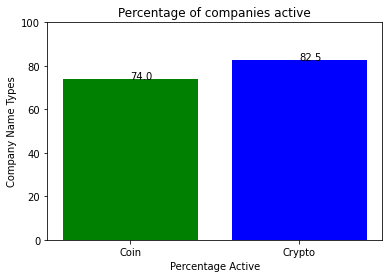

In [69]:
# Checking active number of companies in each group
def get_active_companies(companies):
    active_companies = []
    for company in companies:
        if company['company_status'] == str('active'):
            active_companies.append(company)
    return active_companies

active_coin = get_active_companies(companies_coin)
print(f"Number of active Crypto-companies with 'Coin' in name: {len(active_coin)} out of {len(companies_coin)}, {round(len(active_coin)/len(companies_coin)*100,1)}%")

active_crypto = get_active_companies(companies_crypto)
print(f"Number of active Crypto-companies with 'Crypto' in name: {len(active_crypto)} out of {len(companies_crypto)}, {round(len(active_crypto)/len(companies_crypto)*100,1)}%")  

#print(f"Number of active Crypto-companies with both 'Coin' and Crypto' in their names: {len(active_both)} out of {len(companies_with_both)}") 

#Bar graph representation
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
Coin_Crypto_Percentage=[round(len(active_coin)/len(companies_coin)*100,1),round(len(active_crypto)/len(companies_crypto)*100,1)]
Company_Name=['Coin','Crypto']
New_Colors = ['green','blue','purple','teal']
plt.ylim(0,100)
plt.bar(Company_Name,Coin_Crypto_Percentage, color=New_Colors)
addlabels(Company_Name,Coin_Crypto_Percentage)
plt.title('Percentage of companies active')
plt.ylabel('Company Name Types')
plt.xlabel('Percentage Active')
plt.show()
active_both = get_active_companies(companies_with_both)


For active companies with 'Coin' in name: 4.99


For active companies with 'Crypto' in name: 1.72


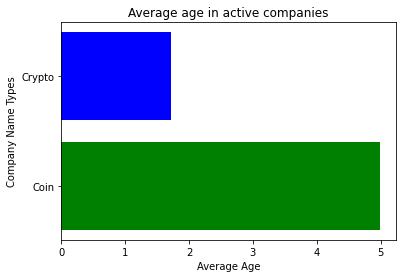

In [70]:
# Since the number of companies with both 'Coin' and Crypto' in their names is very small, we will proceed with 
# lifespan comparison for the two main groups

# Looking at how old active companies are on average
from datetime import date

def average_age(active_companies):
    company_ages = []
    for company in active_companies:
        company_age = date.today() - datetime.strptime(company['date_of_creation'], '%Y-%m-%d').date()
        company_ages.append(company_age.days)
    return round((sum(company_ages)/len(company_ages))/365,2)

print("For active companies with 'Coin' in name: " + str(average_age(active_coin)))
print("\n")
print("For active companies with 'Crypto' in name: " + str(average_age(active_crypto))) 

#Graphical representation by bar plot
Avg_Age=[]
Avg_Age.append(average_age(active_coin))
Avg_Age.append(average_age(active_crypto))
active_companies=['Coin','Crypto']
New_Colors = ['green','blue','purple','teal']
plt.barh(active_companies,Avg_Age, color=New_Colors)
plt.title('Average age in active companies')
plt.ylabel('Company Name Types')
plt.xlabel('Average Age')
plt.show()

For dissolved companies with 'Coin' in name: 2.61
For dissolved companies with 'Crypto' in name: 2.34


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 135 missing from current font.
  font.set_text(s, 0, flags=flags)


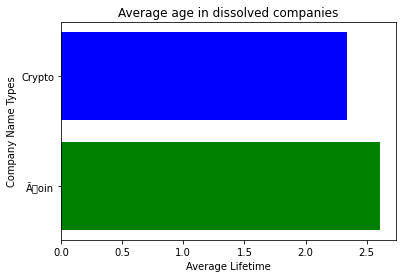

NameError: name 'np' is not defined

In [71]:
# Looking at how long dissolved companies were to exist on average
# We need to have the filtered data for dissolved companies first:


def get_dissolved_companies(companies):
    dissolved_companies = []
    for company in companies:
        if company['company_status'] == str('dissolved'):
            dissolved_companies.append(company)
    return dissolved_companies


dissolved_coin = get_dissolved_companies(companies_coin)
dissolved_crypto = get_dissolved_companies(companies_crypto)


# Now defining the function to calculate average life of the dissolved

def average_lifetime(dissolved_companies):
    age_of_death = []
    for company in dissolved_companies:
        company_age = datetime.strptime(company['date_of_cessation'],
                '%Y-%m-%d').date() \
            - datetime.strptime(company['date_of_creation'], '%Y-%m-%d'
                                ).date()
        age_of_death.append(company_age.days)
    return round(sum(age_of_death) / len(age_of_death) / 365, 2)


print("For dissolved companies with 'Coin' in name: " + str(average_lifetime(dissolved_coin)))

print ("For dissolved companies with 'Crypto' in name: " + str(average_lifetime(dissolved_crypto)))

Avg_lifetime = []
Avg_lifetime.append(average_lifetime(dissolved_coin))
Avg_lifetime.append(average_lifetime(dissolved_crypto))

# Graphical representation by bar plot

active_companies = ['\xc3\x87oin', 'Crypto']
New_Colors = ['green', 'blue', 'purple', 'teal']
plt.barh(active_companies, Avg_lifetime, color=New_Colors)
plt.title('Average age in dissolved companies')
plt.ylabel('Company Name Types')
plt.xlabel('Average Lifetime')
plt.show()

labels = ['Coin', 'Crypto']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

print('Average lifetime/Age of companies by name types and status')

(fig, ax) = plt.subplots()
rects1 = ax.bar(x - width / 2, Avg_Age, width, label='Active')
rects2 = ax.bar(x + width / 2, Avg_lifetime, width, label='Dissolved')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Age')
ax.set_title('Average Age by company name type and status')
plt.xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [ ]:
# Looking at how long dissolved companies were to exist on average
# We need to have the filtered data for dissolved companies first:
import collections
from collections import Counter
def get_cessation_years(companies):
    cessation_year = []
    for company in companies:
        if company['company_status'] == str('dissolved'):
            cessation_year.append(company['date_of_cessation'][0:4])
            cessation_year.sort()
    return cessation_year

def get_cessation_yearmonth(companies):
    cessation_yearmonth = []
    for company in companies:
        if company['company_status'] == str('dissolved') and len(company['date_of_cessation'][6:7])==1:
            cessation_yearmonth.append(company['date_of_cessation'][0:4]+'0'+company['date_of_cessation'][6:7])
            cessation_yearmonth.sort()
    return cessation_yearmonth


dissolved_coin = get_cessation_years(companies_coin)
dissolved_crypto = get_cessation_years(companies_crypto)

dissolved_coin_dict=collections.Counter(dissolved_coin)
dissolved_crypto_dict=collections.Counter(dissolved_crypto)

#Line graph representation of the cessations
plt.plot(dissolved_coin_dict.keys(), dissolved_coin_dict.values(),label='Coin')
plt.title("Cessations by Year")
plt.xlabel("Cessation Year")
plt.ylabel("Number of Cessations")
for x,y in zip(dissolved_coin_dict.keys(),dissolved_coin_dict.values()):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,1), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


p1=plt.plot(dissolved_crypto_dict.keys(), dissolved_crypto_dict.values(),label='Crypto')
plt.title("Cessations by Year for Companies")
plt.xlabel("Cessation Year")
plt.ylabel("Number of Cessations")
for x,y in zip(dissolved_crypto_dict.keys(),dissolved_crypto_dict.values()):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,16), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.legend();


print('Company closures by yearmonth for names having coin')
print(collections.Counter(get_cessation_yearmonth(companies_coin)))
print('\n')
print('Company closures by yearmonth for names having crypto')
print(collections.Counter(get_cessation_yearmonth(companies_crypto)))


requesting: https://api.companieshouse.gov.uk/company/11253260/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/08023371/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/05333426/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/11020618/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/10587975/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/10624771/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/08290467/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/11107039/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/08755809/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/02390016/persons-with-significant-control
requesting: https://api.companieshouse.g

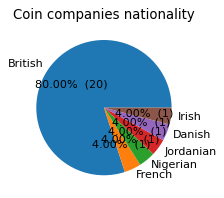

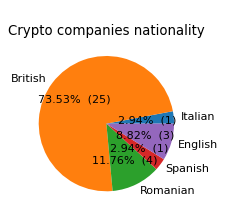

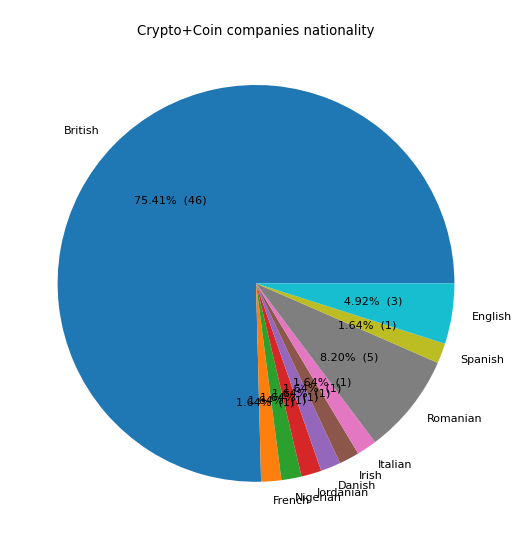

In [72]:
# Checking nationality distribution of people for active companies older than average age of all active companies
all_active_companies = get_active_companies(all_companies)
def older_companies(active_company_group):
    company_numbers = []
    for company in active_company_group:
            company_age = date.today() - datetime.strptime(company['date_of_creation'], '%Y-%m-%d').date()
            if round(company_age.days/365,2) > int(average_age(all_active_companies)):
                company_numbers.append(company['company_number'])
    return company_numbers

mature_coin = older_companies(active_coin)
mature_crypto = older_companies(active_crypto)
mature_all = older_companies(all_active_companies) #if we want to check regardless of company name

def get_people_info(company_numbers):
    people_in_older_companies = []
    for number in company_numbers:
        people_in_older_companies.append(all_persons_in_company(number))
    return people_in_older_companies

people_coin = get_people_info(mature_coin)
people_crypto = get_people_info(mature_crypto)
people_all = get_people_info(mature_all) #if we want to check regardless of company name

def get_nationality_of_people(all_people):
    return [ get_nationality_of_person(people)
            for people in all_people
            if people != []]

def get_nationality_of_person(found_people):
    return [ person['nationality']
            for person in found_people
            if 'nationality' in person.keys()]

nationalities_coin = get_nationality_of_people(people_coin)
nationalities_crypto = get_nationality_of_people(people_crypto)
nationalities_all = get_nationality_of_people(people_all)

#this brings all people where it divides it into lists per company which 
#also reflects to nationalities list. To merge:

def get_edited_list_of_nationalities(found_nationalities):
    merged_list = []
    for nationality in found_nationalities:
        for n in nationality: #this loop is to get rid of company divison lists in the whole list
            merged_list.append(n)
    return merged_list

nationalities_coin_final = get_edited_list_of_nationalities(nationalities_coin)
nationalities_crypto_final = get_edited_list_of_nationalities(nationalities_crypto)
nationalities_all_final = get_edited_list_of_nationalities(nationalities_all)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
#from matplotlib import pyplot as plt
#import numpy as np
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = plt.subplot2grid((2,2),(0,0))
ax.axis('equal')
labels = get_edited_list_of_nationalities(nationalities_coin)
count=Counter(labels)
nationalities = count.keys()
frequency = count.values()
plt.title("Coin companies nationality")
ax.pie(frequency, labels = nationalities,autopct=make_autopct(count.values()))
plt.show()

fig = plt.figure(figsize=(6, 6), dpi=80)
ax = plt.subplot2grid((2,2),(1,1))

ax.axis('equal')
labels = get_edited_list_of_nationalities(nationalities_crypto)
count=Counter(labels)
nationalities = count.keys()
frequency = count.values()
plt.title("\nCrypto companies nationality")
ax.pie(frequency, labels = nationalities,autopct=make_autopct(count.values()))
plt.show()


fig = plt.figure(figsize=(8, 8), dpi=80)
ax = plt.subplot2grid((1,1),(0,0))

ax.axis('equal')
labels = get_edited_list_of_nationalities(nationalities_all)
count=Counter(labels)
nationalities = count.keys()
frequency = count.values()
plt.title("\nCrypto+Coin companies nationality")
ax.pie(frequency, labels = nationalities,autopct=make_autopct(count.values()))
plt.show()

Average age in company names having coin: 51.8
Average age in company names having crypto: 45.03
Average age in company names having coin+crypto: 47.51


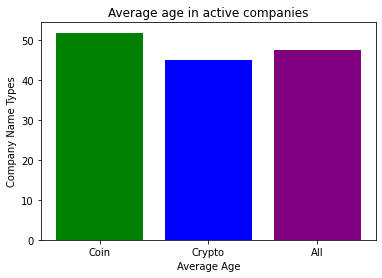

In [73]:
# Checking age distribution of people for active companies older than average age of all active companies
import pandas as pd

def get_ages_of_people(all_people):
    return [ get_age_of_person(people)
            for people in all_people
            if people != []]

def get_age_of_person(people):
    person_ages = []
    for person in people:
        if 'date_of_birth' in person.keys():
            person_age = datetime.now().year - int(person['date_of_birth']['year'])
            person_ages.append(person_age)
    return person_ages

#print(get_ages_of_people(people_coin))


ages_of_people_coin = get_ages_of_people(people_coin)
ages_of_people_crypto = get_ages_of_people(people_crypto)
ages_of_people_all = get_ages_of_people(people_all) #if we want to check regardless of company name

def average_age_of_people(found_ages):
    merged_list = []
    for age in found_ages:
        for a in age: #this loop is to get rid of company divison lists in the whole list
            merged_list.append(a)
    return round(sum(merged_list)/len(merged_list), 2)

average_age_coin = average_age_of_people(ages_of_people_coin)
average_age_crypto = average_age_of_people(ages_of_people_crypto)
average_age_all = average_age_of_people(ages_of_people_all) #if we want to check regardless of company name

print('Average age in company names having coin: '+str(average_age_coin))
print('Average age in company names having crypto: '+str(average_age_crypto))
print('Average age in company names having coin+crypto: '+str(average_age_all))

#Bar chart representation
Avg_Age=[average_age_coin,average_age_crypto,average_age_all]
#Avg_Age.append(average_age(active_coin))
#Avg_Age.append(average_age(active_crypto))
active_companies=['Coin','Crypto','All']
New_Colors = ['green','blue','purple','teal']
plt.bar(active_companies,Avg_Age, color=New_Colors)
plt.title('Average age in active companies')
plt.xlabel('Company Name Types')
plt.ylabel('Average Age')
plt.show()

# Mini-report
'Coin' or 'Crypto': Does the word impacts the future of a crypto company? In our sample of Crypto companies, we would like to see if the lifecycle of companies have a relationship with the term included in company name. Since scammers may take advantage of digital investment world and as cyber-security issues emerge, it is crucial for a crypto company to build trust in the market and company name is expected to play a role. When we analyse samples of 100 companies from each group, despite the very close average life of dissolved companies around 2.4 years and higher % of currently active companies with 'Crypto' in name, active 'Coin' companies are more mature. It is also clear that current active crypto companies are less mature than the dissolved, whereas current active coin companies have survived more years in market compared to the ones dissolved. This concludes that 'Coin' companies started to gain more trust by investors resulting in more sustainable success and to be a 'Coin' company could be prefered for a new initiative. When we check if average age and diversity of people play a role in 'Coin' companies' relative success, we see 'Coin' companies are slightly more diverse and average age of employees is larger. Work culture and experienced people has made 'Coin' companies more sustainable.